### On the Tips dataset

The tips dataset is a dataset based on the tips left by a selection of 244 dining parties, taking account of the following variables:
 - total_bill (the total cost of the bill)
 - tip
 - sex
 - smoker
 - day (the dataset seems to have only sampled on Thursday through Sunday)
 - time (whether this was at lunch or dinner time)
 - size (how many people were in the party)
 
 We shall perform some analyses.

First, we need to set up python for our calculations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import pandas as pd
import seaborn as sns

tips = sns.load_dataset('tips') # The tips dataset already comes with seaborn, but to confirm it is the same 
                                # as the dataset we have just downloaded (which we have called somethingelse.csv),
                                # we compare the two datasets and take the sum to see how many "True"s we get.
                                # As each parameter returns the value 244, and we know there were 244 dining parties,
                                # we know the datasets match at every point, which is reassuring!
tips2=pd.read_csv('somethingelse.csv')
comparison=(tips == tips2)
comparison.sum()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [2]:
#tips # We can uncomment this and run it if we wish to see the extended list, but there is no need, so we just use
      # the following to look at a small selection, to check that the data format 'looks' right.
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Now we have python set up, and the dataset imported, it is time look at some of its basic properties, before conducting any in-depth analysis.

In [3]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
from collections import Counter

for i in ['sex','smoker','day','time','size']:
    print (C(tips.iloc[:][i]))

NameError: name 'C' is not defined

It is perhaps surprising how few people eat out on their own, and how unpopular Friday was, but aside from that there is nothing particularly remarkable about this data when taken by itself. Perhaps our analyses will reveal some interesting correlations later.

### Univariate analysis
We first give a brief overview of the individual variables.

In [ ]:
sns.distplot(tips['total_bill'],kde=False,bins=20); # kde = False means the y-xis
                                                                     # provides the actual number
                                                                     # bins = 20 means the entries are
                                                                     # divided into 20 slots according
                                                                     # to size
plt.show()

In [ ]:
sns.distplot(tips['tip'],kde=False,bins=10);
plt.show()

It looks as though the total_bill and tips have a similar distribution, which might suggest the two are closely related. We will perform some further bivariate analysis later, but for now, let us construct a new data column tip_percent containing the percentage of the meal each tip equated to. We will not add this to the dataset just yet, but it might prove useful for analysis later.

In [ ]:
tip_percent=[];
for i in range(tips.shape[0]): # this iterates over all of the rows in tips
    tip_percent.append(tips.loc[i][0]/tips.loc[i][1]) # this divides the first entry of a row (the total) by the 
                                                      # second entry (the tip) to give the percentage
    
#tip_percent # remove comment to view list

In [ ]:
sns.distplot(tip_percent,kde=True,bins=50);
plt.show()

This graph shows that the tip percent is between about 5 and 8 percent in the overwhelming majority of cases, which strongly suggests that there is correlation (unsurprisingly) between tip size and total bill. We will expect later analyses to confirm this. 

## Side-study: Mr Pink
<font color='blue'>Note: what if someone had left no tip at all? (cf. Mr Pink, Reservoir Dogs, 1992)

We know this is not the case, since we saw above that the minimum tip value is 1, but let us create a fictitious entry just to see.</font>


In [ ]:
mr_pink=tips.append({'total_bill': 10, 'tip' : 0, 'sex' : 'Mr. Pink', 'smoker' : 'yes'}, ignore_index=True)
mr_pink.tail()

<font color='blue'>What happens if we know try to create tip_percent now?</font>


In [ ]:
mr_pink_tip_percent=[];
for i in range(mr_pink.shape[0]):
    mr_pink_tip_percent.append(mr_pink.loc[i][0]/mr_pink.loc[i][1])


<font color='blue'>Unsurprisingly, python complains about dividing by zero. To avoid this, we tweak our for loop.

In [ ]:
mr_pink_tip_percent=[];
for i in range(mr_pink.shape[0]):
    if not mr_pink.loc[i][1]==0:
        mr_pink_tip_percent.append(mr_pink.loc[i][0]/mr_pink.loc[i][1])
        
sns.distplot(mr_pink_tip_percent,kde=True,bins=50);
plt.show()

<font color='blue'> So we are a data point short, but not dividing by zero, so overall a win, I feel. Back to the real dataset. </font>

Now we add the tips_percent to our dataset.

In [ ]:
tips.insert(7,"tip_percent",tip_percent,True)
tips.head()

### Bivariate analysis
Now that we have had our first hint of a correlation, it is time to investigate further to see what else might affect tip size. First, we shall analyse something completely irrelevant, for curiosity. 

Are women or men (at least in this sampe set) more likely to be smokers?

My first attempt, I shall leave in for amusement value, because I spent twenty minutes updating my anaconda to get this function to work, and then very obviously got this completely useless graph.

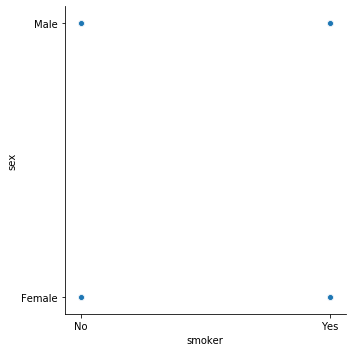

In [6]:
sns.relplot(x='smoker', y='sex',data=tips)
plt.show()


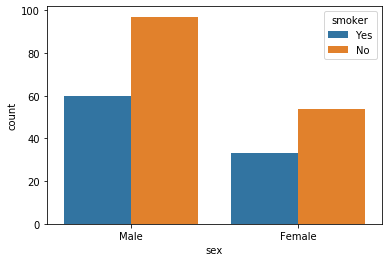

In [22]:
smoker_sex=sns.countplot(x='sex', hue='smoker',data=tips)
plt.show()

So about two fifths of both men and women smoke. Let us briefly run a few more simulations, leaving the interesting tips and total_bill aside.


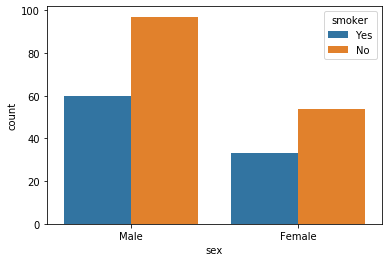

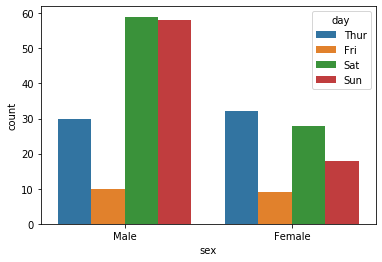

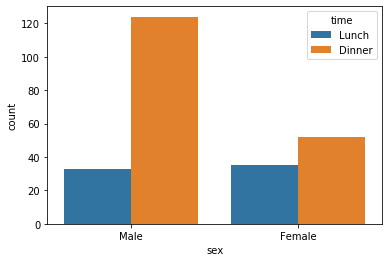

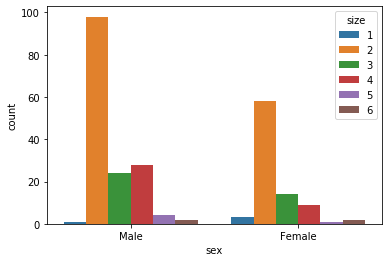

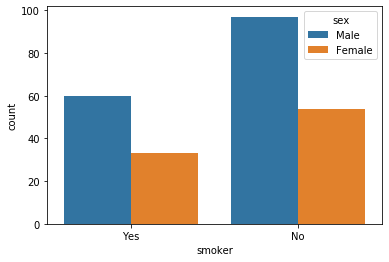

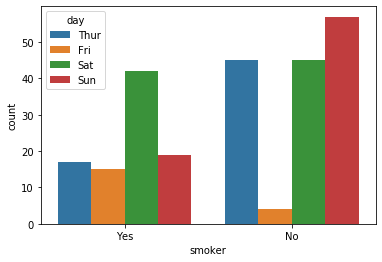

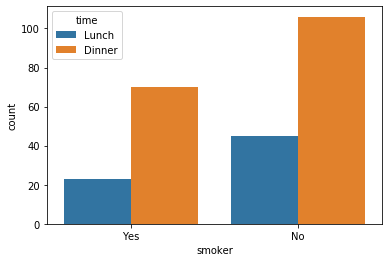

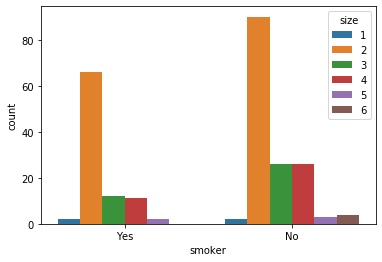

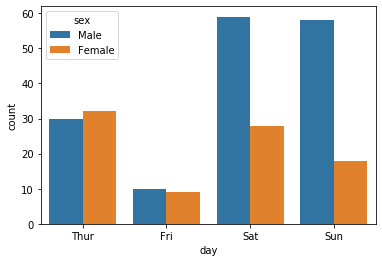

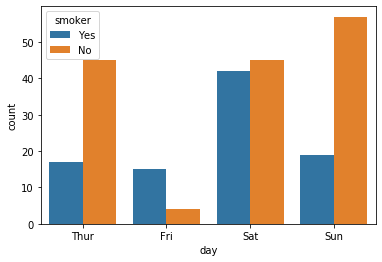

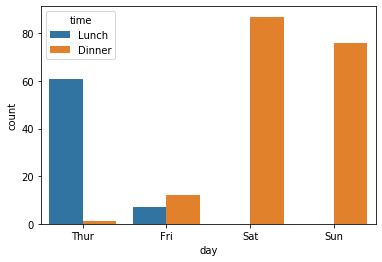

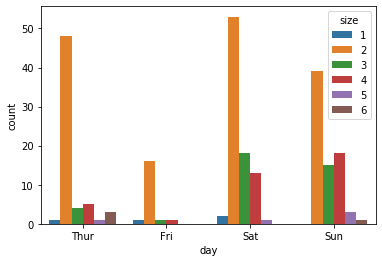

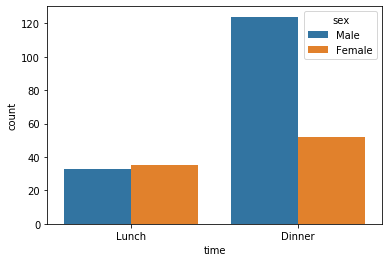

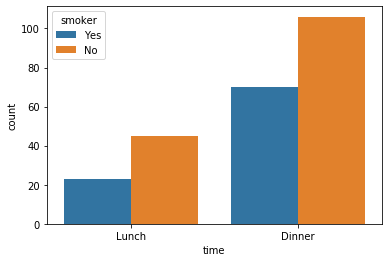

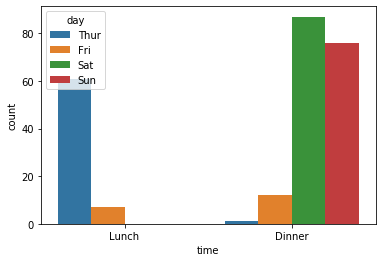

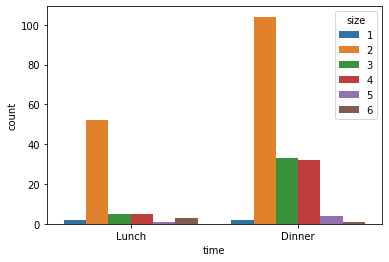

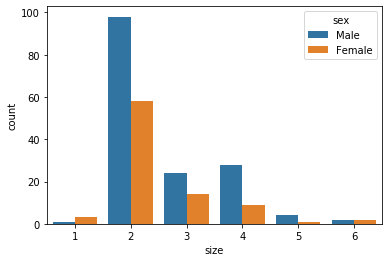

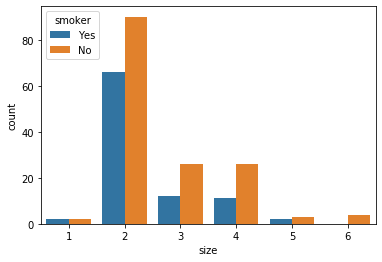

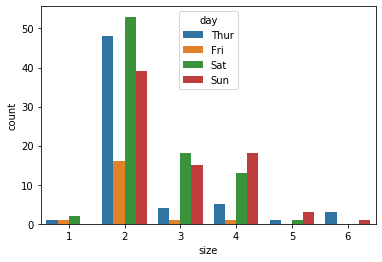

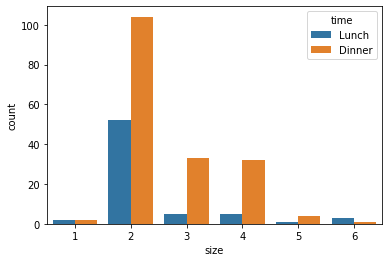

In [31]:
for i in ['sex','smoker','day','time','size']:
    for j in ['sex','smoker','day','time','size']:
        if not i==j:
            sns.countplot(x=i, hue=j,data=tips)
            plt.show()

We can see that roughly the same portion of men and women are smokers, and that men are much more likely to buy dinner than lunch. Women are more likely to eat here on Thursdays, men on the weekend. Most parties were groups of two, for both men and women. Nobody bought lunch on the weekend. Smokers prefer Saturdays, and most people prefer dinner.  People are less likely to smoke if they are with more than one other person, and are slightly more inclined to smoke at lunchtime. Sunday is a better day for groups. 

That is all well and good, but the money is what we really care about.